<a href="https://colab.research.google.com/github/tejaspatni/Yes-Bank-Stock-Price-Prediction---ML-model/blob/main/Yes_bank_Stock_Price_Prediction_Regression_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Yes Bank Limited is an Indian private sector bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapur in 2004. It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. On 5 March 2020, in an attempt to avoid the collapse of the bank, which had an excessive amount of bad loans, the Reserve Bank of India (RBI) took control of it.
To determine the yes bank stock value on national stock exchange by making the machine learning model of regression. The efficient market hypothesis recommends that the stock cost mirror all right now accessible data and any value change that are not founded on a recently uncovered data subsequently are unpredictable. We have to build a model that predicts the stock's future price.

# **GitHub Link -**

https://github.com/tejaspatni/Yes-Bank-Stock-Price-Prediction---ML-model

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

The dataset consists of the yes bank stock price monthly data and having 5 different column which is date,open price,high price,low price and close price.

1. The shape of our dataset is 185 rows and 5 columns
2. The dataset having no duplicate or missing values.
3. Datatype of Date is given as object which we need to change that to DateTime
4. Yes bank stock listed on month of july 2005.We have data available from july 2005 to november 2020

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe

data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

1. **Date**: In our data its monthly observation of stock since it listed.
2. **Open**: The price a stock when the stock exchange open for the day.
3. **High**: The maximum price of a stock attain during given period of time.
4. **Low**: The minimum price of a stock attain during given period of time.
5. **Close**: The price of a stock when the stock exchange closed for the day.


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
data.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df = data.copy()
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [14]:
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

### What all manipulations have you done and insights you found?

Here we manipulated the dates to the format accoding to datetime.
The insights we get that from 2005 , the stock prices increases till 2018 and afterward there is sharp decline in the prices because of the fraud case.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Line chart for Stock price variation (Bivariate)

In [15]:
Features = list(set(df.columns)-{'Date'})
Features

['High', 'Close', 'Low', 'Open']

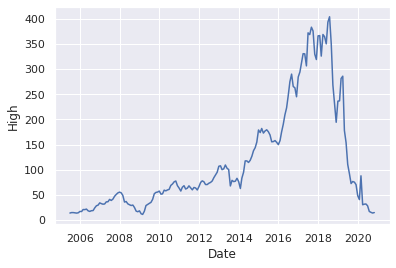

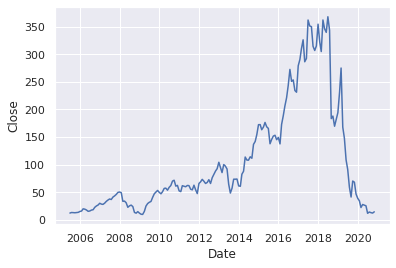

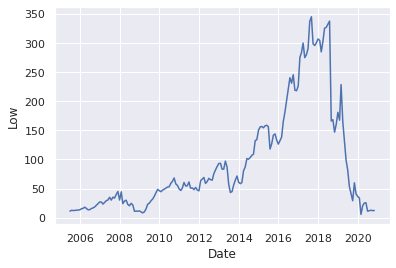

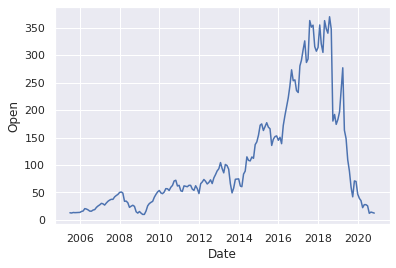

In [16]:
# Chart - 1 visualization code
for col in Features:

# Create the line chart
  sns.lineplot(x= df['Date'],y= df[col])

# Add axis labels
  plt.xlabel('Date')
  plt.ylabel(col) 

# Show the chart
  plt.show()

##### 1. Why did you pick the specific chart?

I suggested a line chart as it is a common and effective way to represent trends and patterns in data over time or a sequence of data points. It can visually show how a variable changes over a continuous period, making it useful for time-series data or any data that has a natural ordering. They are simple to understand, and the patterns or trends in the data are easily interpreted.
Overall, line charts are a versatile and useful tool for data visualization and analysis, and that is why I picked it as an option for representing data.

##### 2. What is/are the insight(s) found from the chart?

All the Charts having stock price produces almost same result with little or no variation of price during that day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights generated were as expected since the price value graph should vary according to the day's price and creating the same graphs for each variable.
From this, we can say that there is very less variation of price during the day.

#### Chart - 2 - Scatter Plot for linearity Check

In [17]:
num_Features = list(set(df.columns)-{'Date','Close'})
num_Features

['High', 'Low', 'Open']

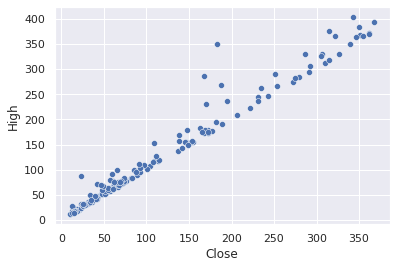

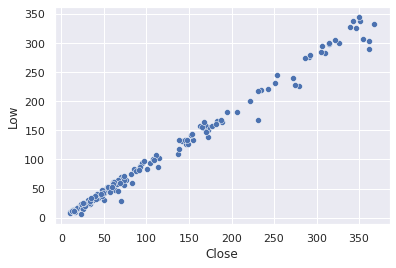

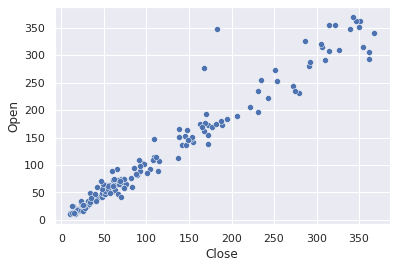

In [18]:
# Chart - 2 visualization code
for col in num_Features:

# Create the line chart
  sns.scatterplot(x= df['Close'],y= df[col])

# Add axis labels
  plt.xlabel('Close')
  plt.ylabel(col) 

# Show the chart
  plt.show()

##### 1. Why did you pick the specific chart?

Scatter charts are a great choice for visualizing the relationship between two variables, especially when you want to see how one variable is affected by the other. They are useful when you want to see whether there is a correlation or pattern between two variables or whether there are any outliers in the data.
scatter charts are a powerful visualization tool that can help you quickly identify patterns, outliers, distributions, and trends in your data.

##### 2. What is/are the insight(s) found from the chart?

All the chart here define a relationship of dependent with independent variables and it can conclude that all of them are linearly plotted with the dependent variable. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to identify the pattern as independent variables are linearly plotted and positively correlated with the dependent variable and the intercept form for this regression is close to zero.

#### Chart - 3 - Distribution Plot

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(close=None, block=None)>

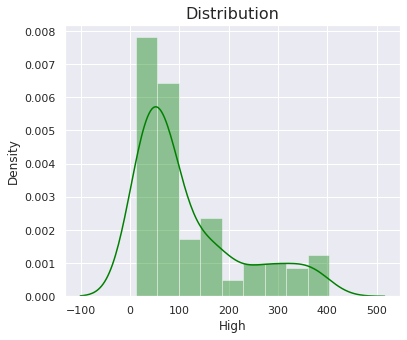

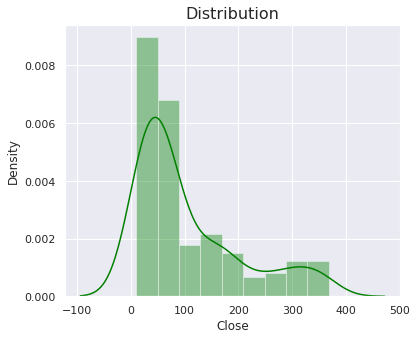

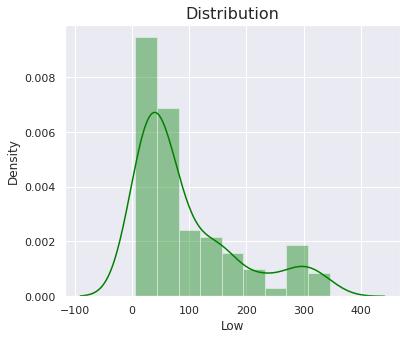

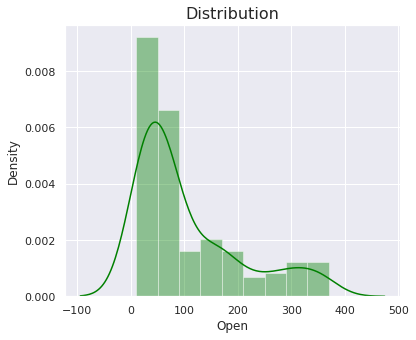

In [19]:
# Chart - 3 visualization code
for col in Features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

##### 1. Why did you pick the specific chart?

Distribution charts, also known as density plots or histograms, are a great choice for visualizing the distribution of data. They show how the data is spread out over a range of values, and can help you identify the shape of the distribution, the presence of outliers, and the location of the center of the data.

##### 2. What is/are the insight(s) found from the chart?

All the charts are right skewed so that it means thats we have to apply a log transformation to make the distribution as normal and there are some possiblities of the outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the density chart can help in creating a positive business impact, we can say that the stock was around 40Rs to 100Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea

#### Chart - 4 - Box Plot

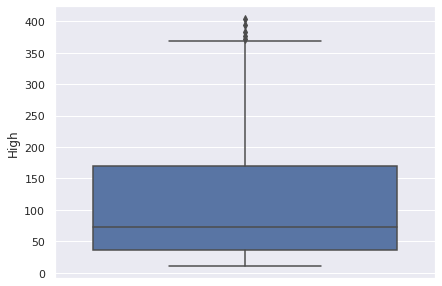

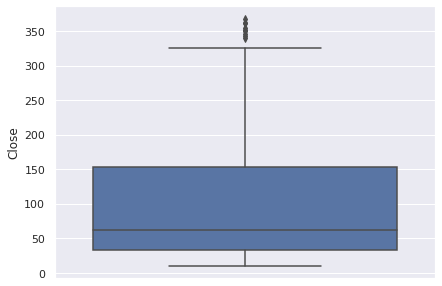

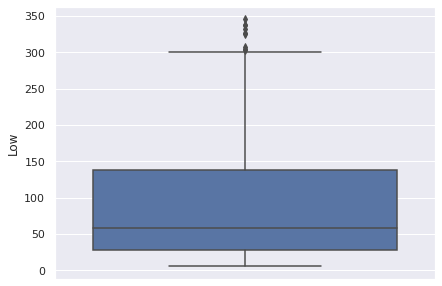

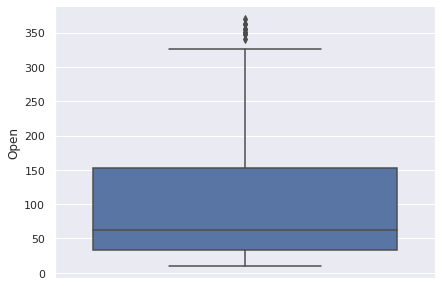

In [20]:
# Chart - 4 visualization code
for col in Features:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.boxplot(y=df[col]) 
  plt.show()

##### 1. Why did you pick the specific chart?

Box plots are a great choice for visualizing the distribution of data, especially when you want to compare the distributions of two or more groups. They are useful for showing the range, median, and quartiles of a dataset, and can help you identify outliers and compare the spread of data between groups.

##### 2. What is/are the insight(s) found from the chart?

The Box plot helps us to determine the outlier but in this case the price of the stock went high than its usual range and showing the values of the prices in outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will create a positive business impact as we can see that the price is going very high as compared to usual range so the stock is going in the overbought region and needs to sell. The fraud case helps to lower down the range of the stock and creted a median of around 50rs.

#### Chart - 5 - Correlation Heatmap

<AxesSubplot:>

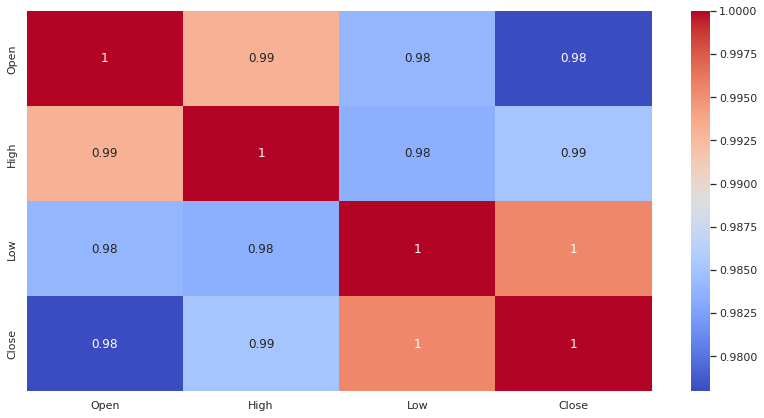

In [21]:
# Correlation Heatmap visualization code
dataset = df.drop(['Date'],axis = 1)
corr=dataset.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot = True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are a powerful visualization tool that can help you visualize relationships, identify patterns and trends, cluster data, and visualize large and complex datasets. They are particularly useful when you have a large number of variables or when you want to see patterns and relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

From the Heatmap, we can say that collinearity between Close and independent variable are high and it is positive impact on the model but the collinearity between independent variable are not good for the model and it is showing very high collinearity between independent variables.

#### Chart - 15 - Pair Plot 

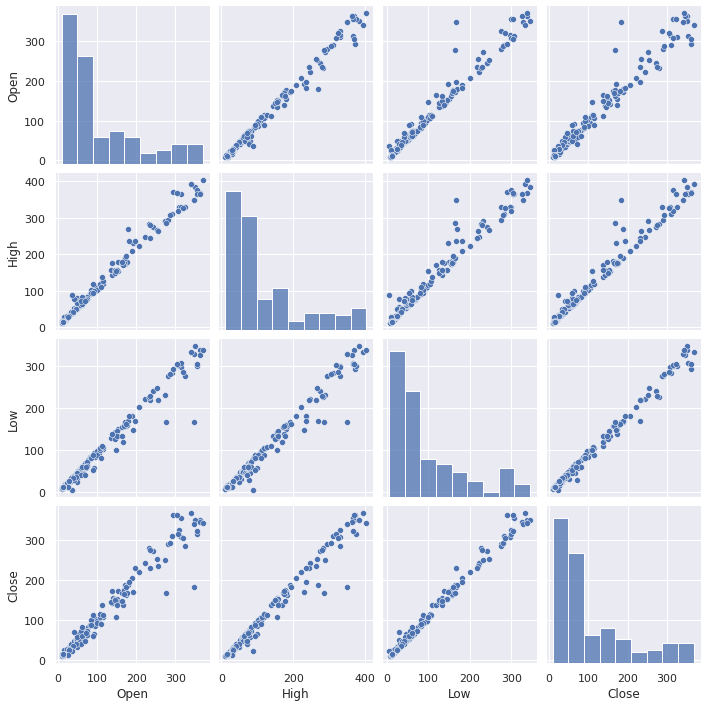

In [22]:
# Pair Plot visualization code
sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

Pair plots, also known as scatterplot matrices, are a great choice for visualizing the relationships between multiple variables in a dataset. They allow you to see scatterplots of all possible pairs of variables in a single figure, making it easy to identify patterns and relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

This creates a scatter plot with each variable making the visuals easy to check the linearity of the dependent and independent variable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [23]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there is no missing values in the dataset, we are not applying any imputation techniques.

### 2. Feature Manipulation & Selection

In [24]:
Independent_variable = dataset.drop(['Close'], axis =1)
Dependent_variable = dataset['Close']

In [25]:
# Calculating VIF
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(Independent_variable)

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

Variation Inflation Factor. VIF measures how much the variance of an estimated regression coefficient is increased due to multicollinearity in the model. A high VIF value indicates that the variance of the coefficient estimate is inflated due to multicollinearity, which means that the coefficient estimate is less reliable.
Therefore, VIF is used to detect and quantify the extent of multicollinearity in a regression model.

##### Which all features you found important and why?

Even though we have high VIF scores, we will not perform feature engineering because for this particular case as each feature is important. In the real world, most indicators take into account each of these features to predict future values.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes the data needs to be transformed because it has not normally distributed and right skewed. So to make then distributed normally, we use log transformation

In [27]:
# Transform Your data
x = np.log10(Independent_variable)
y = np.log10(Dependent_variable)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

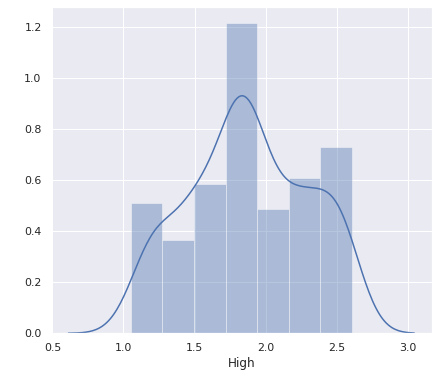

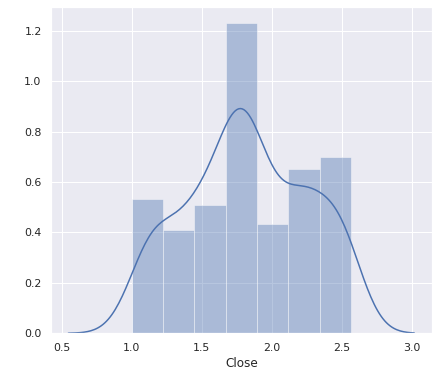

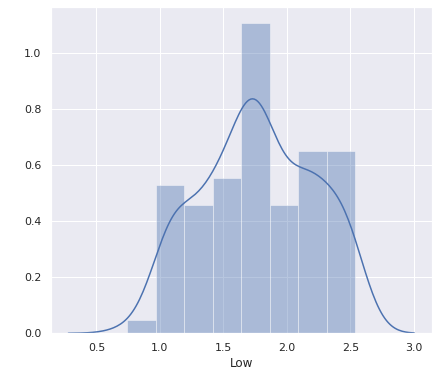

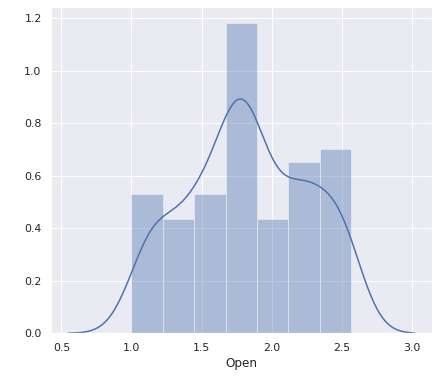

In [28]:
for var in Features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(dataset[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

### 8. Data Splitting

In [29]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 365) 
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 

A split of 80-20 % is done on Trian and Test respectively, beacuse its considered to be optimum split.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [30]:
# ML Model - 1 Implementation
reg = LinearRegression()
# Fit the Algorithm
reg.fit(X_train,y_train)
# Predict on the model
reg.score(X_train,y_train)

0.9946314453186754

In [31]:
reg.coef_

array([-0.58799917,  0.87223821,  0.72043806])

In [34]:
y_pred = reg.predict(X_test)

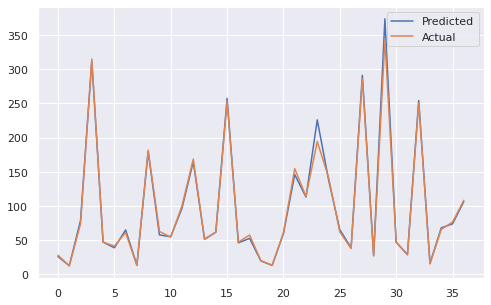

In [35]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [36]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.25634327517334
RMSE : 7.762495943649397
R2 : 0.9924495983459266
Adjusted R2 :  0.9917631981955563


### ML Model - 2 - Lasso and Ridge Regression

###1. Using Lasso Regression

In [37]:
lasso = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [38]:
lasso.score(X_train, y_train)


0.7131097891380471

In [39]:
y_pred_lasso = lasso.predict(X_test)

In [40]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3986.667997781018
RMSE : 63.14006650124007
R2 : 0.5004518527248663
Adjusted R2 :  0.4550383847907632


**Lasso Regression : Actual Vs Predicted**

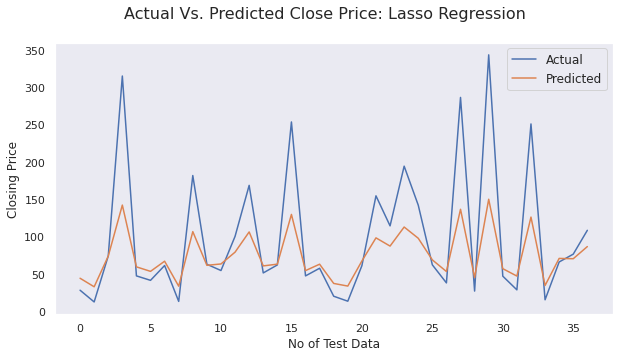

In [41]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

 Cross- Validation & Hyperparameter Tuning

In [42]:
lasso_cv = Lasso(tol=1e-2)
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [43]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(tol=0.01),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
lasso_model_cv.best_params_

{'alpha': 1e-15}

In [45]:
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

In [46]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 51.56887561725996
RMSE : 7.1811472354533965
R2 : 0.9935381786780332
Adjusted R2 :  0.9929507403760361


**Lasso Regression after CV : Actual Vs Predicted**

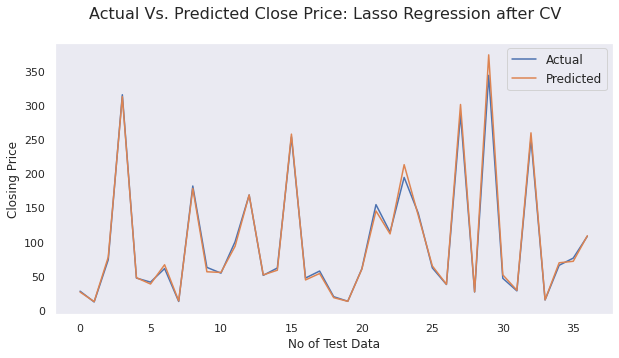

In [47]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression after CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is a very good improvement since the accuracy increased tremendiously from 50% to 99%

###2. Using Ridge Regression

In [48]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_train, y_train)

0.9935548783773316

In [49]:
y_pred_ridge = ridge.predict(X_test)

In [50]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 45.08656396027968
RMSE : 6.714652929249559
R2 : 0.9943504426488747
Adjusted R2 :  0.9938368465260452


**Ridge Regression : Actual Vs Predicted**

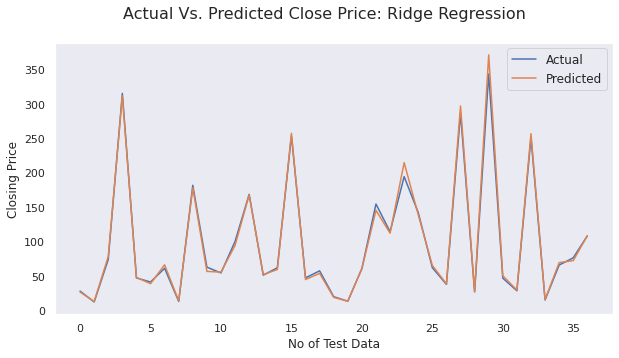

In [51]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

 Cross- Validation & Hyperparameter Tuning

In [52]:
ridge_cv = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_cv, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [53]:
ridge_regressor.best_params_

{'alpha': 1e-15}

In [54]:
y_pred_ridge_cv = ridge_regressor.predict(X_test)

In [55]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.25634327517011
RMSE : 7.7624959436491885
R2 : 0.992449598345927
Adjusted R2 :  0.9917631981955568


**Ridge Regression after CV : Actual Vs Predicted**

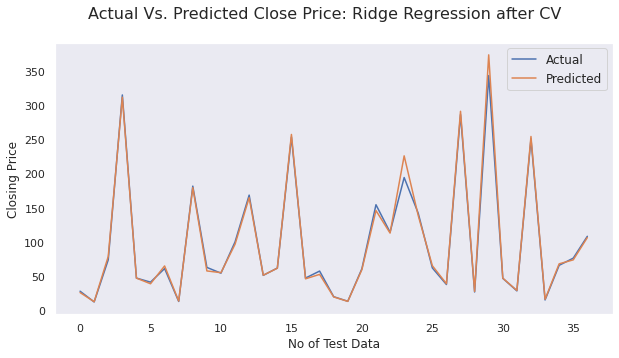

In [56]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression after CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No There is no such improvement and maintained an accuracy percentage of 99%

### ML Model - 3 - Elastic Net Regression

In [57]:
# ML Model - 3 Implementation

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [58]:
elastic.score(X_train,y_train)

0.8786441633878774

In [59]:
y_pred_elastic = elastic.predict(X_test)

In [60]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1932.7604810105645
RMSE : 43.96317187158548
R2 : 0.7578160714780299
Adjusted R2 :  0.7357993507033054


**Elastic Net Regresstion : Actual Vs Predicted**

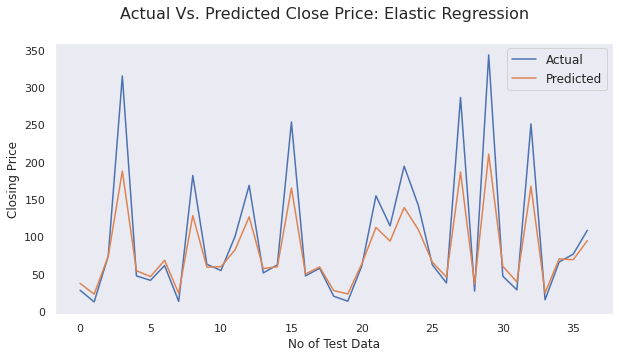

In [61]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic_cv = ElasticNet(tol=1e-1)
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [63]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(tol=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1]},
             scoring='neg_mean_squared_error')

In [64]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.3}

In [65]:
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

In [66]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 101.6519267596414
RMSE : 10.082258018898415
R2 : 0.9872625381125314
Adjusted R2 :  0.9861045870318524


**Elastic Net Regresstion after CV: Actual Vs Predicted**

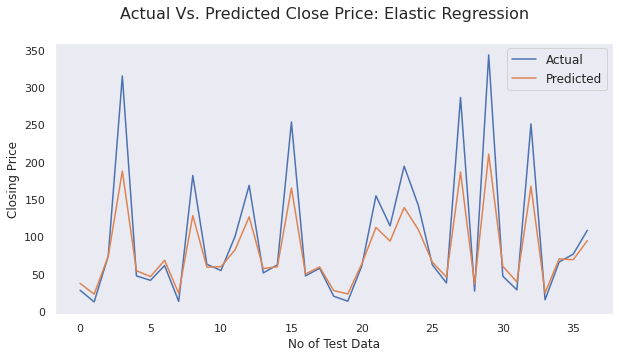

In [67]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is a good improvement as its accuracy increases from 75% to 98%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to consider R^2 Evaluation matric for the positove business impact because it helps to find out the accuracy of the model generated and how effective it will be in predicting fuuture values or in decision making

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would like to choose the simple linear regression model and the ridge regression model because of good prediction accuracy than lasso and Elastic Net and good scores of evalution metrics.

# **Conclusion**

*  There is increase in trend of Yes Bank's stock's Close,Open,High,Low price till 2018 and then sudden decrease.
*  We observed that open vs close price graph concluded that after 2018 yes bank's stock hitted drastically.
*  We saw Linear relation between the dependent and independent values.
*  There was alot of multicollinearity present in data.
*  Target variable(dependent variable) strongly dependent on independent variables
*  We get maximum accuracy of 99%.
*  Linear regression and Ridge regression get almost same R squared value
*  Lasso model shows lowest R squared value and high MSE,RMSE,MAE,MAPE


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***